## Assignment 2 : Finish Citibikes Mini Project
sjf374, qg412, yg833

Worked with Sam Falk and QY Goh for the initial beginning of this project in HW4. So we worked together to finish the project. 
We began by reviewing what we had done initially, comparing our notebooks and the comments from our reviewers. We discussed the scope of the assignment. 

### Define Hypothesis

IDEA: More people bike on Saturdays than Sundays.

Null hypothesis: The mean bike trips on Saturdays are the same or less than the mean of bike trips on Sundays in 4 selected months representing each season of the year.

Alternative hypothesis:  The mean bike trips on Saturdays are more than the mean bike trips on Sundays in 4 selected months representing each season of the year.

p = .05

#### Equation
_$H_0$ : $Sun_{\mathrm{Avg}} - Sat_{\mathrm{Avg}} => 0$

_$H_1$ : $Sun_{\mathrm{Avg}} - Sat_{\mathrm{Avg}} < 0$

In [26]:
from __future__ import division, print_function
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import os

# In a notebook environment, display the plots inline
%matplotlib inline


In [2]:
# setting environmental variable
# uses the os lib
if os.getenv ("PUIDATA") is None:
    print ("Must set env variable PUI2018")
print(os.getenv("PUIDATA"))

/nfshome/yg833/PUIdata


In [3]:
#from homework 4 citibikes example-- adapted from to adjust for environment variables

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
# get the citibikes data for the months of Feb, May, August, and November
months = ['201602','201605','201608', '201611']
for x in months: 
   getCitiBikeCSV(x)

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [5]:
# create an empty dictionary called cbdf
cbdf = {}

# read each citibike month dataset into the dictionary
for x in months:
   cbdf[x] = pd.read_csv("%s/%s-citibike-tripdata.csv" % (os.getenv("PUIDATA"), x))

In [6]:
# print the columns names to check
for key, value in cbdf.items():
   print (key)
   print (value.columns)
# replace the column names from the february frame into the november frame
cbdf['201611'].columns = cbdf['201602'].columns

201602
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201605
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201608
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object'

In [7]:
# concat the frame together/ stacked ontop of each other
citidf = pd.concat(cbdf.values())

In [8]:
# reset the index inplace
citidf.reset_index(drop=True, inplace=True)

In [9]:
citidf.head() # check teh dataframe

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [10]:
len(citidf) # check the length

4527759

In [11]:
# check for the column names again
citidf.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [12]:
# create a date variable that is formatted into pandas format %Y-%m-%d hh:mm:ss
citidf['date'] = pd.to_datetime(citidf['starttime'])

# find the week day number 0 for Monday - 6 for Sunday
citidf['weekdaynum'] = citidf['date'].apply(lambda x: x.weekday())

In [13]:
citidf.head() # check the dataframe

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekdaynum
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1,2016-02-01 00:00:08,0
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1,2016-02-01 00:00:56,0
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1,2016-02-01 00:01:00,0
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2,2016-02-01 00:01:00,0
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1,2016-02-01 00:01:41,0


In [14]:
# using a dictionary to map week num to week day name
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

citidf['weekday'] = citidf['weekdaynum'].apply(lambda x : days[x] )

In [15]:
citidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4527759 entries, 0 to 4527758
Data columns (total 18 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
date                       datetime64[ns]
weekdaynum                 int64
weekday                    object
dtypes: datetime64[ns](1), float64(5), int64(6), object(6)
memory usage: 621.8+ MB


In [16]:
# inspect for the counts per weekday
citidf['weekdaynum'].value_counts()

0    745881
1    743783
2    741919
3    674636
4    605214
5    526146
6    490180
Name: weekdaynum, dtype: int64

In [17]:
citidf.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,weekdaynum
count,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.010622e+06,4.527759e+06,4.527759e+06
mean,9.599626e+02,1.060971e+03,4.073798e+01,-7.398613e+01,1.044602e+03,4.073720e+01,-7.398556e+01,2.103537e+04,1.977745e+03,1.097628e+00,2.704251e+00
std,8.656379e+03,1.180844e+03,2.434534e-02,1.633715e-02,1.170762e+03,1.348342e-01,2.414511e-01,3.561853e+03,1.168295e+01,5.671039e-01,1.946518e+00
min,6.100000e+01,7.200000e+01,4.064668e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.406419e+01,1.452900e+04,1.885000e+03,0.000000e+00,0.000000e+00
25%,3.810000e+02,3.400000e+02,4.072110e+01,-7.399725e+01,3.360000e+02,4.072083e+01,-7.399790e+01,1.793400e+04,NaN,1.000000e+00,1.000000e+00
50%,6.310000e+02,4.650000e+02,4.073913e+01,-7.398802e+01,4.620000e+02,4.073902e+01,-7.398848e+01,2.139200e+04,NaN,1.000000e+00,3.000000e+00
75%,1.074000e+03,2.003000e+03,4.075510e+01,-7.397711e+01,5.460000e+02,4.075467e+01,-7.397722e+01,2.394700e+04,NaN,1.000000e+00,4.000000e+00
max,4.319753e+06,3.440000e+03,4.080421e+01,-7.392989e+01,3.440000e+03,4.080421e+01,0.000000e+00,2.734200e+04,2.000000e+03,2.000000e+00,6.000000e+00


In [18]:
#create new column with date only
citidf['date_only'] = citidf['date'].apply(lambda x: x.date())

In [19]:
#confirm all dates present
citidf['date_only'].unique()

array([datetime.date(2016, 2, 1), datetime.date(2016, 2, 2),
       datetime.date(2016, 2, 3), datetime.date(2016, 2, 4),
       datetime.date(2016, 2, 5), datetime.date(2016, 2, 6),
       datetime.date(2016, 2, 7), datetime.date(2016, 2, 8),
       datetime.date(2016, 2, 9), datetime.date(2016, 2, 10),
       datetime.date(2016, 2, 11), datetime.date(2016, 2, 12),
       datetime.date(2016, 2, 13), datetime.date(2016, 2, 14),
       datetime.date(2016, 2, 15), datetime.date(2016, 2, 16),
       datetime.date(2016, 2, 17), datetime.date(2016, 2, 18),
       datetime.date(2016, 2, 19), datetime.date(2016, 2, 20),
       datetime.date(2016, 2, 21), datetime.date(2016, 2, 22),
       datetime.date(2016, 2, 23), datetime.date(2016, 2, 24),
       datetime.date(2016, 2, 25), datetime.date(2016, 2, 26),
       datetime.date(2016, 2, 27), datetime.date(2016, 2, 28),
       datetime.date(2016, 2, 29), datetime.date(2016, 5, 1),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 3),
    

In [20]:
#checkout the size of each date and within each weekday
pd.DataFrame(citidf[['weekdaynum', 'date_only']].groupby(['weekdaynum', 'date_only']).size())

0
weekdaynum date_only        
0          2016-02-01  24334
           2016-02-08  19026
           2016-02-15   5884
           2016-02-22  28233
           2016-02-29  27954
           2016-05-02  38537
           2016-05-09  45724
           2016-05-16  42787
           2016-05-23  48578
           2016-05-30  32619
           2016-08-01  49401
           2016-08-08  52262
           2016-08-15  49063
           2016-08-22  54404
           2016-08-29  53288
           2016-11-07  49890
           2016-11-14  48834
           2016-11-21  32972
           2016-11-28  42091
1          2016-02-02  28528
           2016-02-09  22741
           2016-02-16  14542
           2016-02-23  16133
           2016-05-03  22858
           2016-05-10  44849
           2016-05-17  43396
           2016-05-24  34796
           2016-05-31  49756
           2016-08-02  56764
           2016-08-09  56112
...                      ...
5          2016-02-27  17226
           2016-05-07  31078
           2016-05-14  42063
           2016-05-21  30519
           2016-05-28  34222
           2016-08-06  44213
           2016-08-13  38912
           2016-08-20  45817
           2016-08-27  45674
           2016-11-05  48689
           2016-11-12  34667
           2016-11-19  41213
           2016-11-26  23811
6          2016-02-07  17605
           2016-02-14   4653
           2016-02-21  20052
           2016-02-28  25437
           2016-05-01  10697
           2016-05-08  31197
           2016-05-15  28661
           2016-05-22  37802
           2016-05-29  36877
           2016-08-07  43631
           2016-08-14  32961
           2016-08-21  35051
           2016-08-28  44639
           2016-11-06  39413
           2016-11-13  36810
           2016-11-20  20617
           2016-11-27  24077

[121 rows x 1 columns]

In [21]:
# Scatterplot showing average trip duration for each day of the week.  

In [21]:
graphunredacted = pd.DataFrame(citidf.groupby(['weekdaynum', 'date_only']).size()).reset_index()
graphunredacted.columns = ['weekdaynum', 'date_only', 'count']

In [22]:
graphunredacted.head()

,weekdaynum,date_only,count
0,0,2016-02-01,24334
1,0,2016-02-08,19026
2,0,2016-02-15,5884
3,0,2016-02-22,28233
4,0,2016-02-29,27954


In [23]:
graphdates = graphunredacted.set_index('date_only')
graphdates.head()

,weekdaynum,count
date_only,,
2016-02-01,0,24334
2016-02-08,0,19026
2016-02-15,0,5884
2016-02-22,0,28233
2016-02-29,0,27954


Text(0,0.5,'Bike Ride Counts')

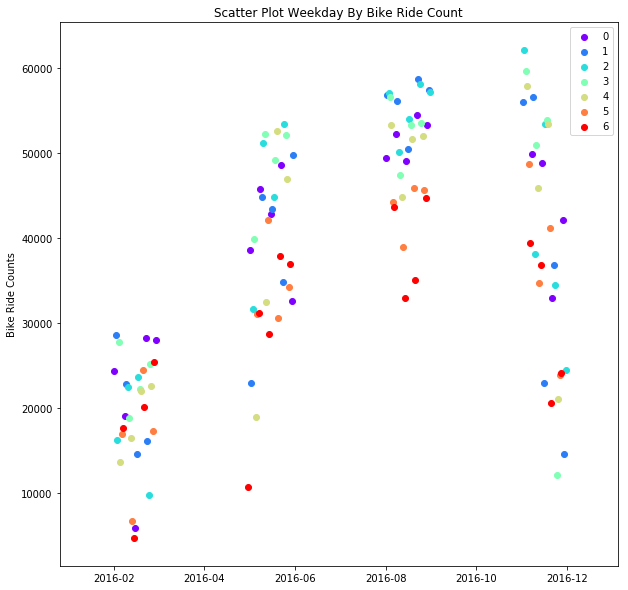

In [30]:
from matplotlib import cm
plt.figure(figsize=(10,10))
colors = cm.rainbow(np.linspace(0,1,len(graphdates['weekdaynum'].unique())))

for x in graphdates['weekdaynum'].unique():
    graphweekday = graphdates[graphdates['weekdaynum'] == x]
    plt.scatter(graphweekday.index, y = graphweekday['count'], color=colors[x])

plt.legend(graphdates['weekdaynum'].unique())
plt.title('Scatter Plot Weekday By Bike Ride Count')
plt.ylabel('Bike Ride Counts')


### Figure 1:
Scatterplot showing each day's total trip count for all 4 months, color coded according to which day of the week it is (0 is Monday and 6 is Sunday). It can be observed that generally, Saturdays (orange) and Sundays (red) tend to have lower total trip counts than the rest of the weekday.

In [31]:
# create graph to map the means and standard dev

overall_std = pd.DataFrame(graphunredacted.groupby(['weekdaynum'])['count'].std()).reset_index()
overall_std.columns = ['weekdaynum', 'std']
overall_std

overall_mn = pd.DataFrame(graphunredacted.groupby(['weekdaynum'])['count'].mean()).reset_index()
overall_mn.columns = ['weekdaynum', 'mean']
overall_mn

errorgraph = pd.merge(overall_mn, overall_std, how='inner', on='weekdaynum').reset_index()

In [32]:
errorgraph

,index,weekdaynum,mean,std
0,0,0,39256.894737,13390.667646
1,1,1,39146.473684,16440.142061
2,2,2,41217.722222,16431.444793
3,3,3,42164.750000,15506.624584
4,4,4,37825.875000,16097.188543
5,5,5,32884.125000,12260.505373
6,6,6,28834.117647,11372.296602


Text(0.5,1,'AVG Count of Weekday Rides and the Corresponding Error Bars')

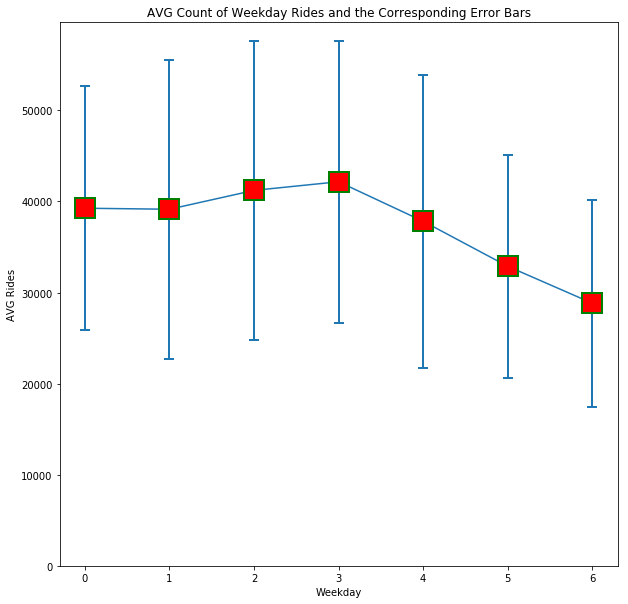

In [35]:
plt.figure(figsize=(10,10))
plt.errorbar(errorgraph['weekdaynum'], errorgraph['mean'], errorgraph['std'], marker='s', mfc='red',
        mec='green', ms=20, capsize=5, elinewidth=2, markeredgewidth=2)
plt.ylim(0)
plt.xlabel('Weekday')
plt.ylabel('AVG Rides')
plt.title('AVG Count of Weekday Rides and the Corresponding Error Bars')
#plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Figure 2:
Error bar graph showing the overall means and standard deviation from the means for all mondays to sundays throughout the 4 selected months (0 is Monday and 6 is Sunday).  It can be observed that overall Sunday has the lowest mean and the smallest standard deviation. Saturday is the next lowest. Wednesday is a peak ridership day. 

In [36]:
graphdates.index

Index([2016-02-01, 2016-02-08, 2016-02-15, 2016-02-22, 2016-02-29, 2016-05-02,
       2016-05-09, 2016-05-16, 2016-05-23, 2016-05-30,
       ...
       2016-05-22, 2016-05-29, 2016-08-07, 2016-08-14, 2016-08-21, 2016-08-28,
       2016-11-06, 2016-11-13, 2016-11-20, 2016-11-27],
      dtype='object', name='date_only', length=121)

In [37]:
# The code for creating the boxplot was sampled from a tutorial from Oracle site below
# https://www.datascience.com/blog/learn-data-science-intro-to-data-visualization-in-matplotlib

days = np.unique(graphdates['weekdaynum'])
graphweekday = []
for day in days:
    graphweekday.append(graphdates[graphdates['weekdaynum'] == day]['count'].values)

In [38]:
# Define a function to create a boxplot:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color})

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

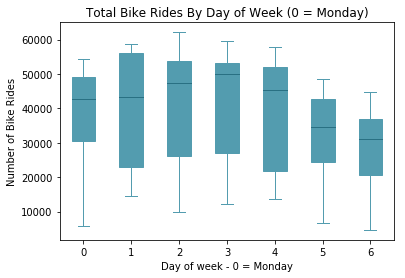

In [39]:
# Call the function to create plot
boxplot(x_data = days
        , y_data = graphweekday
        , base_color = '#539caf'
        , median_color = '#297083'
        , x_label = 'Day of week - 0 = Monday'
        , y_label = 'Number of Bike Rides'
        , title = 'Total Bike Rides By Day of Week (0 = Monday)')

### Figure 3:

Box plot of bike rides per weekday (0 is Monday and 6 is Sunday). The  box plot shows the the median of each weekday, and see that  Saturday has a higher median than Sunday. The max for Saturday is also higher than the max for Sunday. 

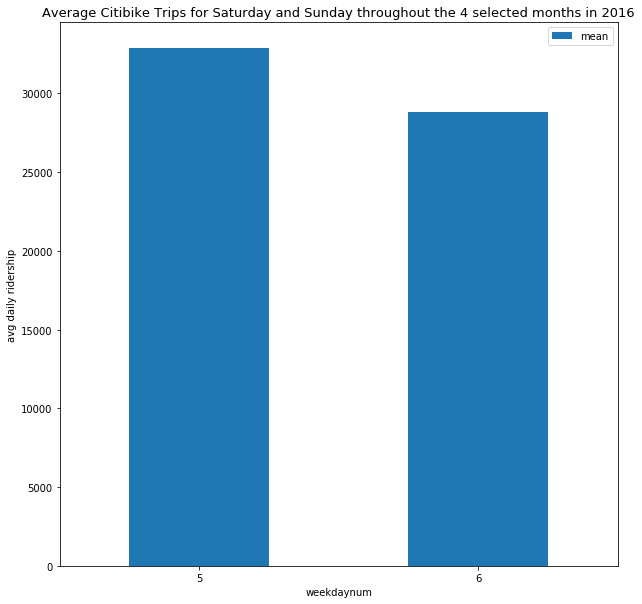

In [49]:
errorgraph[errorgraph['weekdaynum'] >4][['weekdaynum', 'mean']].plot.bar(x= 'weekdaynum', y ='mean' , rot= 0, figsize = (10,10))
plt.ylabel('avg daily ridership')
plt.title('Average Citibike Trips for Saturday and Sunday throughout the 4 selected months in 2016', fontsize = 13);

### Figure 4:
Bar graph showing  the overall average ridership for  Saturday (5) and Sunday (6).  Saturdays have a higher mean than Sundays.  

In [40]:
from scipy import stats

In [41]:
sat = graphunredacted[graphunredacted['weekdaynum']== 5]['count']
sun = graphunredacted[graphunredacted['weekdaynum']== 6]['count']

In [42]:
two_sample = stats.ttest_ind(sat,sun, equal_var = True)

print("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

# assuming unequal population variances
two_sample_diff_var = stats.ttest_ind(sat, sun, equal_var=False)

print("If we assume unequal variances than the t-statistic is %.3f and the p-value is %.3f." % two_sample_diff_var)

The t-statistic is 0.985 and the p-value is 0.332.
If we assume unequal variances than the t-statistic is 0.982 and the p-value is 0.334.


Since the p-value is much higher than 0.05 we fail to reject the null hypothesis. 